# Exploratory Data Analysis and Prediction of Healthcare Insurance Prices

![Alt Text](insurance.jpg)

## Problem Statement

Businesses, particularly insurance companies, heavily rely on customer data. By understanding demographic information such as age, gender, and location, they can make informed business decisions that enhance their operations and customer satisfaction.

## Dataset Overview

This comprehensive dataset provides valuable insights into the impact of personal characteristics on medical insurance premiums. It enables researchers and analysts to explore the influence of factors such as age, gender, weight, family size, and smoking habits on insurance pricing. Furthermore, the dataset facilitates the development of predictive models that can forecast healthcare expenses.

Each field within the dataset is defined as follows:

- **Age:** The age of the insured individual.

- **Sex:** The gender of the insured (male or female).

- **BMI (Body Mass Index):** A standardized measure of body fat calculated based on height and weight.

- **Children:** The number of dependents covered under the insurance plan.

- **Smoker:** Indicates whether the insured individual engages in smoking (yes or no).

- **Region:** The geographical location within which the insurance coverage is provided.

- **Charges:** The total medical insurance expenses incurred by the insured individual.


## Step Wise Tasks 

1. Importing Required Libraries

2. Loading the data Set

3. Understanding the Data

4. Capturing / Detecting Numeric and Categorical Variables

5. Analysis of Categorical Variables

6. Analysis of Numerical Variables

7. Analysis of Categorical Variables by Target

8. Analysis of Numeric Variables by Target

9. Correlation Analysis

10. Distribution of the Dependent Variable

11. Examining the Logarithm of the Dependent Variable

12. Outliers Analysis

13. Feature Extraction

14. Encoding

15. Standardization Process

16. Creating Model

17. Hyperparameter optimization

18. Final Model Predictions and Comparison with True Prices

19. Feature Importance

## 1. Import Required Libraries

In [592]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
import warnings
warnings.simplefilter(action="ignore")

## 2. Loading the data Set

In [594]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3.Understanding the data and cleaning if needed

In [596]:
print("_______________shape____________")
print(df.shape)
print("________________dtypes__________")
print(df.dtypes)
print("_______________head_______________")
print(df.head())
print("_______________tail_______________")
print(df.tail())
print("________________sum of null values______")
df.isnull().sum()


_______________shape____________
(2772, 7)
________________dtypes__________
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
_______________head_______________
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
_______________tail_______________
      age     sex     bmi  children smoker     region      charges
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  nort

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [597]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


## 4. Capturing / Detecting Numeric and Categorical Variables

In [599]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

   
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [600]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 2772
Variables: 7
cat_cols: 4
num_cols: 3
cat_but_car: 0
num_but_cat: 1


In [601]:
cat_cols

['sex', 'smoker', 'region', 'children']

In [602]:
num_cols

['age', 'bmi', 'charges']

In [603]:
cat_but_car

[]

In [604]:
num_but_cat

['children']

In [605]:
num_cols = [x for x in num_cols if x!='charges']

In [606]:
print(num_cols)

['age', 'bmi']


## 5. Analysis of Categorical Variables

In [608]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")
        plt.xticks(rotation=45)
        plt.show(block=True)

         sex      Ratio
sex                    
male    1406  50.721501
female  1366  49.278499
##########################################


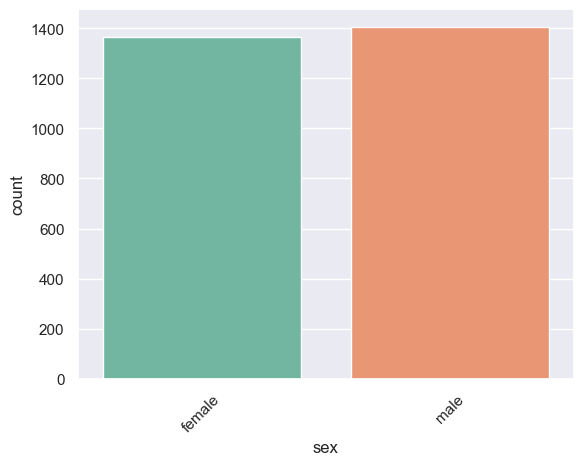

        smoker     Ratio
smoker                  
no        2208  79.65368
yes        564  20.34632
##########################################


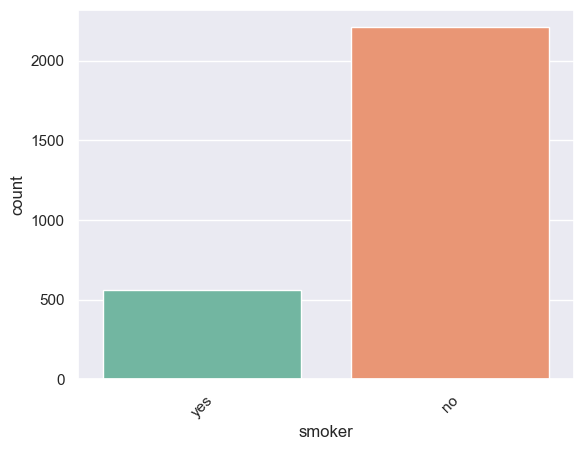

           region      Ratio
region                      
southeast     766  27.633478
southwest     684  24.675325
northwest     664  23.953824
northeast     658  23.737374
##########################################


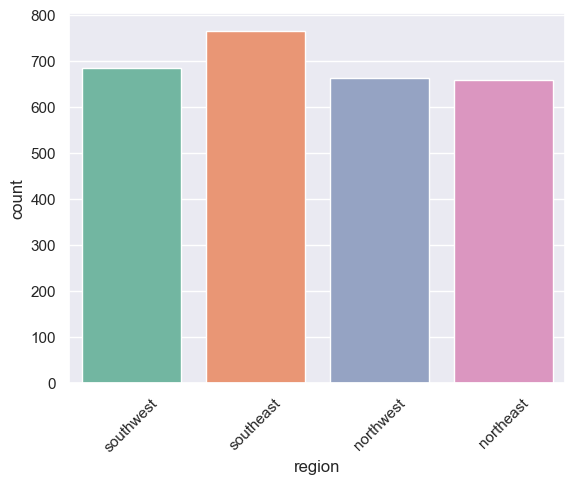

          children      Ratio
children                     
0             1186  42.784993
1              672  24.242424
2              496  17.893218
3              324  11.688312
4               52   1.875902
5               42   1.515152
##########################################


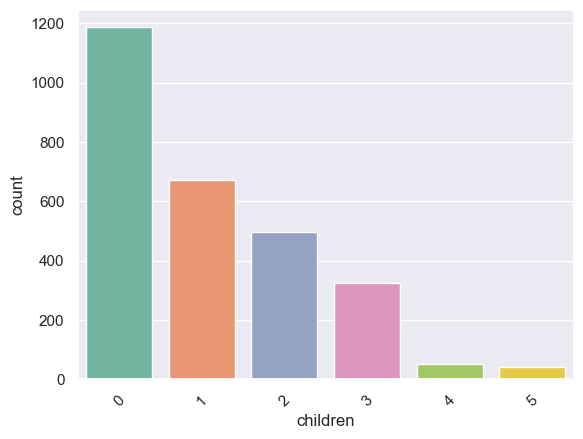

In [609]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

## 6. Analysis of Numerical Variables

In [611]:
def num_summary(dataframe, col_name, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)

    if plot:
        sns.histplot(data=dataframe, x=col_name, bins=20, kde=True, color="blue")
        plt.xticks(rotation=45)
        plt.show()

count    2772.000000
mean       39.109668
std        14.081459
min        18.000000
5%         18.000000
10%        19.000000
20%        24.000000
30%        29.000000
40%        34.000000
50%        39.000000
60%        44.000000
70%        49.000000
80%        54.000000
90%        59.000000
95%        62.000000
99%        64.000000
max        64.000000
Name: age, dtype: float64


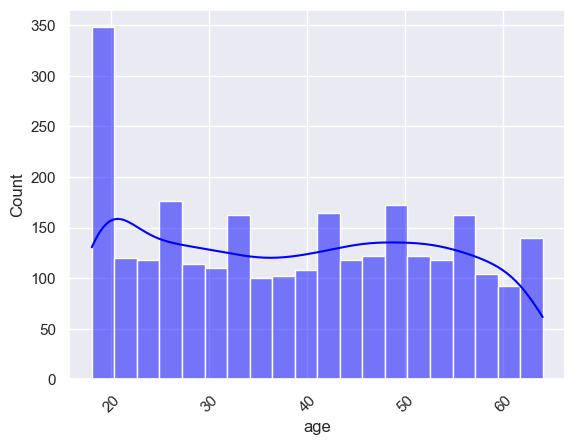

count    2772.000000
mean       30.701349
std         6.129449
min        15.960000
5%         21.280000
10%        22.990000
20%        25.300000
30%        27.318000
40%        28.880000
50%        30.447500
60%        32.110000
70%        33.756500
80%        35.910000
90%        38.893000
95%        41.230000
99%        46.530000
max        53.130000
Name: bmi, dtype: float64


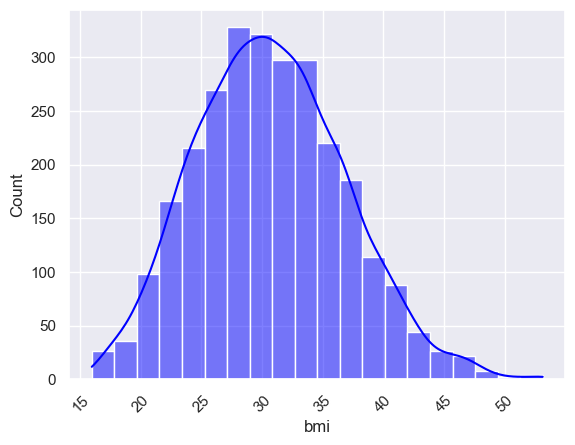

In [612]:
for col in num_cols:
    num_summary(df, col, plot=True)

## 7. Analysis of Categorical Variables by Target

In [614]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe, palette="Set2")
        plt.xticks(rotation=45)
        plt.show(block=True)

         TARGET_MEAN
sex                 
female  12486.831977
male    14013.872721




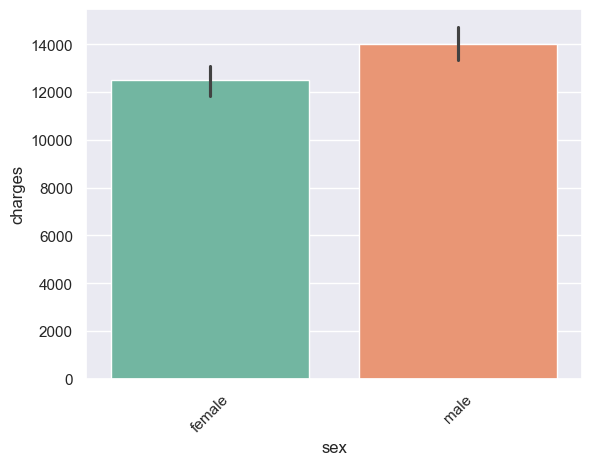

         TARGET_MEAN
smoker              
no       8417.874411
yes     32223.139764




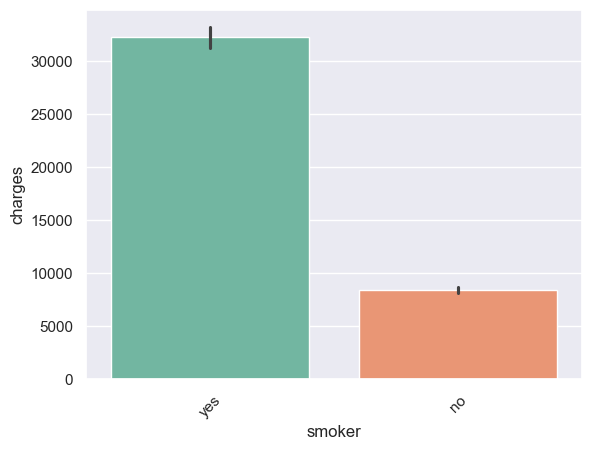

            TARGET_MEAN
region                 
northeast  13475.874737
northwest  12463.129315
southeast  14748.777706
southwest  12164.196435




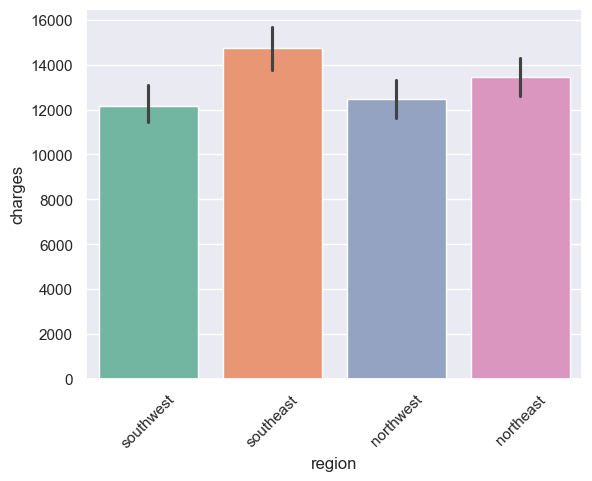

           TARGET_MEAN
children              
0         12317.920881
1         12722.650521
2         15268.182723
3         15304.070620
4         13550.983876
5          8706.036629




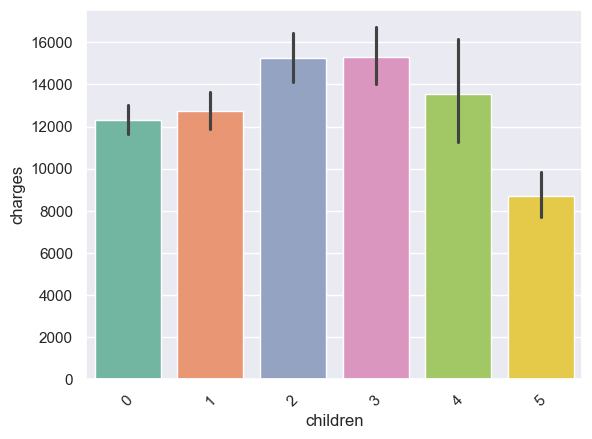

In [615]:
for col in cat_cols:
    target_summary_with_cat(df, "charges", col, plot=True)

## 8. Analysis of Numeric Variables by Target

In [617]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

In [618]:
for col in num_cols:
    target_summary_with_num(df, "charges", col, plot=False)

             age_mean
charges              
1121.87390       18.0
1131.50660       18.0
1135.94070       18.0
1136.39940       18.0
1137.01100       18.0
...               ...
55135.40209      33.0
58571.07448      31.0
60021.39897      52.0
62592.87309      45.0
63770.42801      54.0

[1337 rows x 1 columns]


             bmi_mean
charges              
1121.87390     23.210
1131.50660     30.140
1135.94070     33.330
1136.39940     33.660
1137.01100     34.100
...               ...
55135.40209    35.530
58571.07448    38.095
60021.39897    34.485
62592.87309    30.360
63770.42801    47.410

[1337 rows x 1 columns]




## 9. Correlation Analysis

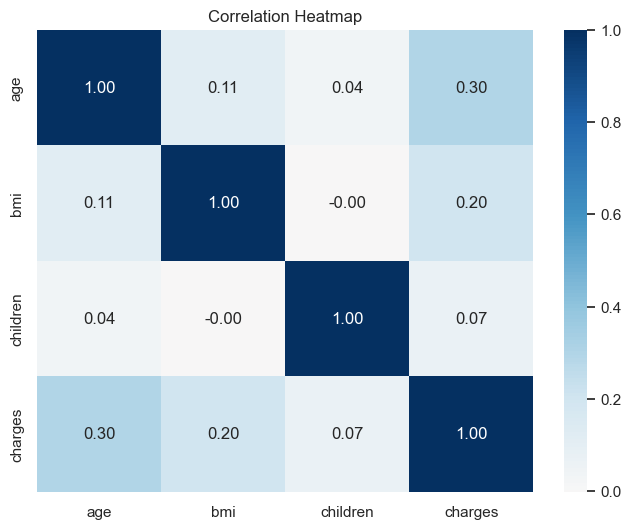

In [620]:
numeric_df = df.select_dtypes(include=np.number)

corr = numeric_df.corr()


plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", center=0)
plt.title("Correlation Heatmap")
plt.show()

## 10. Distribution of the Dependent Variable

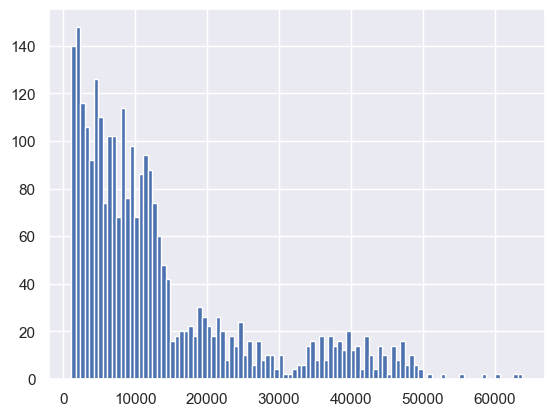

In [622]:
df["charges"].hist(bins=100)
plt.show(block=True)

## 11. Examining the Logarithm of the Dependent Variable

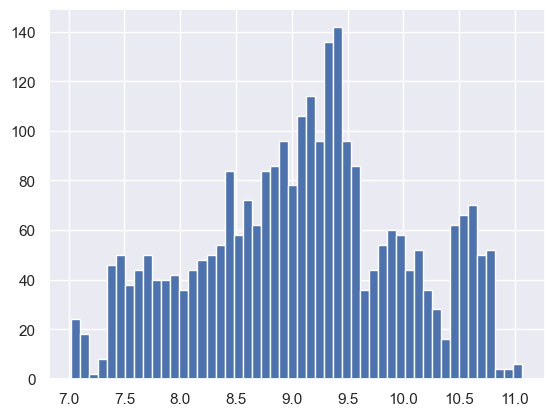

In [624]:
np.log1p(df['charges']).hist(bins=50,)
plt.show(block=True)

## 12. Outliers Analysis

In [626]:
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [627]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [628]:
for col in num_cols:
    print(col, check_outlier(df, col))

age False
bmi False


## 13. Feature Extraction

In [630]:

male_condition = df['sex'] == 'male'
df.loc[male_condition, 'AGE_GROUP'] = pd.cut(
    df.loc[male_condition, 'age'],
    bins=[0, 40, 60, 100],
    labels=["Young_Adults_Male", "Middle-Aged_Adults_Male", "Old_Adults_Male"],
    right=False
)

df['AGE_GROUP'] = df['AGE_GROUP'].astype(str)



In [631]:
female_condition = df['sex'] == 'female'
df.loc[female_condition, 'AGE_GROUP'] = pd.cut(
    df.loc[female_condition, 'age'],
    bins=[0, 40, 60, 100],
    labels=["Young_Adults_Female", "Middle-Aged_Adults_Female", "Old_Adults_Female"],
    right=False
).astype(str)  

In [632]:
df['NEW_BMI'] = pd.cut(x=df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100],
                       labels=["Underweight", "Healthy", "Overweight", "Obese",]).astype(str)

In [633]:
df["NEW_AGE_BMI_NOM"] = df["NEW_BMI"] + df["AGE_GROUP"]

In [634]:
# 1. RISKY: Those who both smoke and are overweight/obese
df['risk_high'] = ((df['smoker'] == "yes") &
              (df['NEW_BMI'].isin(['Overweight', 'Obese']))).astype(int)

# 2. RISK: Only overweight/obese (including non-smokers)
df['risk_medium'] = df['NEW_BMI'].isin(['Overweight', 'Obese']).astype(int)

In [635]:
df["risk_score"] = df["risk_high"] * 50 + df["risk_medium"] * 25 + df["age"]

In [636]:
df['risk_group'] = pd.qcut(x=df['risk_score'], q=4,
                       labels=["no_risk", "medium_risky", "high_risky", "very_high_risky"]).astype(str)

In [637]:
df['bmi_age_ratio'] = df['bmi'] / df['age']
df['children_smoker'] = df['children'] * df['smoker'].map({'yes': 1, 'no': 0})

In [638]:
df['age_squared'] = df['age'] ** 2
df['bmi_cubed'] = df['bmi'] ** 3

In [639]:
df.columns = [col.upper() for col in df.columns]

In [640]:
df.head()

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES,AGE_GROUP,NEW_BMI,NEW_AGE_BMI_NOM,RISK_HIGH,RISK_MEDIUM,RISK_SCORE,RISK_GROUP,BMI_AGE_RATIO,CHILDREN_SMOKER,AGE_SQUARED,BMI_CUBED
0,19,female,27.900,0,yes,southwest,16884.92400,Young_Adults_Female,Overweight,OverweightYoung_Adults_Female,1,1,94,very_high_risky,1.468421,0,361,21717.639000
1,18,male,33.770,1,no,southeast,1725.55230,Young_Adults_Male,Obese,ObeseYoung_Adults_Male,0,1,43,no_risk,1.876111,0,324,38511.743633
2,28,male,33.000,3,no,southeast,4449.46200,Young_Adults_Male,Obese,ObeseYoung_Adults_Male,0,1,53,medium_risky,1.178571,0,784,35937.000000
3,33,male,22.705,0,no,northwest,21984.47061,Young_Adults_Male,Healthy,HealthyYoung_Adults_Male,0,0,33,no_risk,0.688030,0,1089,11704.814053
4,32,male,28.880,0,no,northwest,3866.85520,Young_Adults_Male,Overweight,OverweightYoung_Adults_Male,0,1,57,medium_risky,0.902500,0,1024,24087.491072


## 14. Encoding

In [642]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 2772
Variables: 18
cat_cols: 10
num_cols: 7
cat_but_car: 1
num_but_cat: 4


In [643]:
cat_cols

['SEX',
 'SMOKER',
 'REGION',
 'AGE_GROUP',
 'NEW_BMI',
 'RISK_GROUP',
 'CHILDREN',
 'RISK_HIGH',
 'RISK_MEDIUM',
 'CHILDREN_SMOKER']

In [644]:
num_cols

['AGE',
 'BMI',
 'CHARGES',
 'RISK_SCORE',
 'BMI_AGE_RATIO',
 'AGE_SQUARED',
 'BMI_CUBED']

In [645]:
cat_but_car

['NEW_AGE_BMI_NOM']

In [646]:
num_but_cat

['CHILDREN', 'RISK_HIGH', 'RISK_MEDIUM', 'CHILDREN_SMOKER']

In [647]:
cat_cols = cat_cols + cat_but_car

In [648]:
cat_cols

['SEX',
 'SMOKER',
 'REGION',
 'AGE_GROUP',
 'NEW_BMI',
 'RISK_GROUP',
 'CHILDREN',
 'RISK_HIGH',
 'RISK_MEDIUM',
 'CHILDREN_SMOKER',
 'NEW_AGE_BMI_NOM']

In [649]:
# Label Encoding

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [650]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [651]:
binary_cols

['SEX', 'SMOKER']

In [652]:
for col in binary_cols:
    df = label_encoder(df, col)

In [653]:
df.head()

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES,AGE_GROUP,NEW_BMI,NEW_AGE_BMI_NOM,RISK_HIGH,RISK_MEDIUM,RISK_SCORE,RISK_GROUP,BMI_AGE_RATIO,CHILDREN_SMOKER,AGE_SQUARED,BMI_CUBED
0,19,0,27.900,0,1,southwest,16884.92400,Young_Adults_Female,Overweight,OverweightYoung_Adults_Female,1,1,94,very_high_risky,1.468421,0,361,21717.639000
1,18,1,33.770,1,0,southeast,1725.55230,Young_Adults_Male,Obese,ObeseYoung_Adults_Male,0,1,43,no_risk,1.876111,0,324,38511.743633
2,28,1,33.000,3,0,southeast,4449.46200,Young_Adults_Male,Obese,ObeseYoung_Adults_Male,0,1,53,medium_risky,1.178571,0,784,35937.000000
3,33,1,22.705,0,0,northwest,21984.47061,Young_Adults_Male,Healthy,HealthyYoung_Adults_Male,0,0,33,no_risk,0.688030,0,1089,11704.814053
4,32,1,28.880,0,0,northwest,3866.85520,Young_Adults_Male,Overweight,OverweightYoung_Adults_Male,0,1,57,medium_risky,0.902500,0,1024,24087.491072


In [654]:
# One-Hot Encoding

cat_cols = [col for col in cat_cols if col not in binary_cols]

In [655]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [656]:
df = one_hot_encoder(df, cat_cols)

In [657]:
df.head()

,AGE,SEX,BMI,SMOKER,CHARGES,RISK_SCORE,BMI_AGE_RATIO,AGE_SQUARED,BMI_CUBED,REGION_northeast,...,NEW_AGE_BMI_NOM_OverweightMiddle-Aged_Adults_Male,NEW_AGE_BMI_NOM_OverweightOld_Adults_Female,NEW_AGE_BMI_NOM_OverweightOld_Adults_Male,NEW_AGE_BMI_NOM_OverweightYoung_Adults_Female,NEW_AGE_BMI_NOM_OverweightYoung_Adults_Male,NEW_AGE_BMI_NOM_UnderweightMiddle-Aged_Adults_Female,NEW_AGE_BMI_NOM_UnderweightMiddle-Aged_Adults_Male,NEW_AGE_BMI_NOM_UnderweightOld_Adults_Female,NEW_AGE_BMI_NOM_UnderweightYoung_Adults_Female,NEW_AGE_BMI_NOM_UnderweightYoung_Adults_Male
0,19,0,27.900,1,16884.92400,94,1.468421,361,21717.639000,False,...,False,False,False,True,False,False,False,False,False,False
1,18,1,33.770,0,1725.55230,43,1.876111,324,38511.743633,False,...,False,False,False,False,False,False,False,False,False,False
2,28,1,33.000,0,4449.46200,53,1.178571,784,35937.000000,False,...,False,False,False,False,False,False,False,False,False,False
3,33,1,22.705,0,21984.47061,33,0.688030,1089,11704.814053,False,...,False,False,False,False,False,False,False,False,False,False
4,32,1,28.880,0,3866.85520,57,0.902500,1024,24087.491072,False,...,False,False,False,False,True,False,False,False,False,False


## 15. Standardization Process

In [659]:
num_cols = [col for col in num_cols if col not in ["CHARGES"]]

In [660]:
scaler = RobustScaler()

In [661]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [662]:
df.head(10)

,AGE,SEX,BMI,SMOKER,CHARGES,RISK_SCORE,BMI_AGE_RATIO,AGE_SQUARED,BMI_CUBED,REGION_northeast,...,NEW_AGE_BMI_NOM_OverweightMiddle-Aged_Adults_Male,NEW_AGE_BMI_NOM_OverweightOld_Adults_Female,NEW_AGE_BMI_NOM_OverweightOld_Adults_Male,NEW_AGE_BMI_NOM_OverweightYoung_Adults_Female,NEW_AGE_BMI_NOM_OverweightYoung_Adults_Male,NEW_AGE_BMI_NOM_UnderweightMiddle-Aged_Adults_Female,NEW_AGE_BMI_NOM_UnderweightMiddle-Aged_Adults_Male,NEW_AGE_BMI_NOM_UnderweightOld_Adults_Female,NEW_AGE_BMI_NOM_UnderweightYoung_Adults_Female,NEW_AGE_BMI_NOM_UnderweightYoung_Adults_Male
0,-0.80,0,-0.297953,1,16884.92400,0.852941,1.281876,-0.602597,-0.271100,False,...,False,False,False,True,False,False,False,False,False,False
1,-0.84,1,0.388596,0,1725.55230,-0.647059,2.047434,-0.621818,0.428382,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.44,1,0.298538,0,4449.46200,-0.352941,0.737598,-0.382857,0.321143,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.24,1,-0.905556,0,21984.47061,-0.941176,-0.183537,-0.224416,-0.688138,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.28,1,-0.183333,0,3866.85520,-0.235294,0.219193,-0.258182,-0.172394,False,...,False,False,False,False,True,False,False,False,False,False
5,-0.32,0,-0.550585,0,3756.62160,-0.264706,0.083658,-0.290909,-0.465344,False,...,False,False,False,True,False,False,False,False,False,False
6,0.28,0,0.350000,0,8240.58960,0.176471,-0.110442,0.309091,0.381816,False,...,False,False,False,False,False,False,False,False,False,False
7,-0.08,0,-0.316667,0,7281.50560,-0.088235,-0.067678,-0.078961,-0.286573,False,...,False,False,False,True,False,False,False,False,False,False
8,-0.08,1,-0.072222,0,6406.41070,-0.088235,0.038392,-0.078961,-0.070097,True,...,False,False,False,False,True,False,False,False,False,False
9,0.84,0,-0.538889,0,28923.13692,0.588235,-0.666813,1.080000,-0.457033,False,...,False,True,False,False,False,False,False,False,False,False


## 16. Creating Model

In [665]:
y = df["CHARGES"]

In [666]:
X = df.drop(["LOG_CHARGES", "CHARGES"], axis=1)

In [667]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [668]:
# Model list
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor(n_jobs=1)),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor(n_jobs=1)),
         
          ("XGBoost", XGBRegressor(objective='reg:squarederror', n_jobs=1))
          ]
# Initialize empty lists to store metrics and execution times
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []
model_names = []

# Main loop to fit, predict, and evaluate each model
for name, regressor in models:
    start_time = time.time()

    # Fit the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    
    # Calculate R^2 score
    r2 = metrics.r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate MAE
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # Calculate MSE
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calculate the execution time of the model
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    # Store model name
    model_names.append(name)

# Create a DataFrame to hold all the metrics and execution times
results_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_scores,
    'R^2 Score': r2_scores,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'Execution Time (s)': execution_times
})

results_df

,Model,RMSE,R^2 Score,MAE,MSE,Execution Time (s)
0,LR,5694.071895,0.788753,3627.360200,3.242245e+07,0.570546
1,Ridge,5693.443139,0.788799,3595.878905,3.241529e+07,0.032884
2,Lasso,5690.495308,0.789018,3589.485872,3.238174e+07,0.389671
3,ElasticNet,7103.996148,0.671186,5298.121026,5.046676e+07,0.020336
4,KNN,5065.990563,0.832785,2782.617142,2.566426e+07,0.079019
5,CART,2496.369316,0.959397,520.828564,6.231860e+06,0.043964
6,RF,2929.939373,0.944068,1421.751498,8.584545e+06,1.438385
7,XGBoost,2710.283020,0.952140,1129.080149,7.345634e+06,0.127032


## 17. Hyperparameter optimization

In [670]:
# Initializing lists to store metrics
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []
model_names = []

# Defining the hyperparameters for each model

param_grids = {
    'LR': {},
    'Ridge': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
    'KNN': {'n_neighbors': [1, 3, 5, 7, 9]},
    'CART': {'max_depth': [None, 5, 10, 20, 30], 'min_samples_leaf': [1, 2, 3]},
    'RF': {'n_estimators': [10, 30, 50, 70, 100], 'max_depth': [None, 5, 10, 20]},
    
    'XGBoost': {'n_estimators': [10, 30, 50, 70, 100], 'learning_rate': [0.005, 0.01, 0.05, 0.1]},
  
}


best_global_score = np.inf
best_global_model = None


for name, regressor in models:
    start_time = time.time()
    
    # Hyperparameter tuning with GridSearchCV if param_grids is defined
    if param_grids.get(name):
        grid_search = GridSearchCV(regressor, param_grid=param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = regressor
        best_model.fit(X_train, y_train)

   
    y_pred = best_model.predict(X_test)

    # Calculating Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

  
    if rmse < best_global_score:
        best_global_score = rmse
        best_global_model = best_model

  
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)


    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    # Storing model name
    model_names.append(name)


results_with_tuning_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_scores,
    'R^2 Score': r2_scores,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'Execution Time (s)': execution_times
})

results_with_tuning_df

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.571e+10, tolerance: 2.628e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.468e+10, tolerance: 2.592e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.469e+10, toler

,Model,RMSE,R^2 Score,MAE,MSE,Execution Time (s)
0,LR,5694.071895,0.788753,3627.360200,3.242245e+07,0.015431
1,Ridge,5693.443139,0.788799,3595.878905,3.241529e+07,3.162312
2,Lasso,5695.691715,0.788632,3586.521889,3.244090e+07,1.315081
3,ElasticNet,5694.465861,0.788723,3599.910428,3.242694e+07,2.658723
4,KNN,3164.059220,0.934772,736.154699,1.001127e+07,0.575572
5,CART,2769.211660,0.950036,592.812607,7.668533e+06,0.477058
6,RF,2890.566942,0.945561,1381.380497,8.355377e+06,15.388774
7,XGBoost,3442.319872,0.922795,1728.413410,1.184957e+07,1.983301


In [671]:
best_global_model

DecisionTreeRegressor()

In [678]:
# Final Prediction Model
final_model = best_global_model


y_final_pred = final_model.predict(X_test)
final_y_pred = (y_final_pred)
final_y_test =(y_test)

In [682]:
# Creating DataFrame with predicted and actual values
results = pd.DataFrame({'Predicted Value': final_y_pred, 'True Value': final_y_test})

results['Difference'] = results['True Value'] - results['Predicted Value']


results['Absolute Difference'] = results['Difference'].abs()

print("5 worst predictions:")
print(results.sort_values(by='Absolute Difference', ascending=False).head().drop('Absolute Difference', axis=1))


print("\ntop 5 predictions:")
print(results.sort_values(by='Absolute Difference').head().drop('Absolute Difference', axis=1))

5 worst predictions:
      Predicted Value   True Value   Difference
2500      22395.74424   2396.09590 -19999.64834
1114      22395.74424   2396.09590 -19999.64834
471       21344.84670   2203.47185 -19141.37485
1857      21344.84670   2203.47185 -19141.37485
1929      47269.85400  63770.42801  16500.57401

top 5 predictions:
      Predicted Value   True Value  Difference
1106       8988.15875   8988.15875         0.0
2010      12129.61415  12129.61415         0.0
678       12363.54700  12363.54700         0.0
1557       8116.68000   8116.68000         0.0
2550       7153.55390   7153.55390         0.0


## 18. Final Model Predictions and Comparison with True Prices

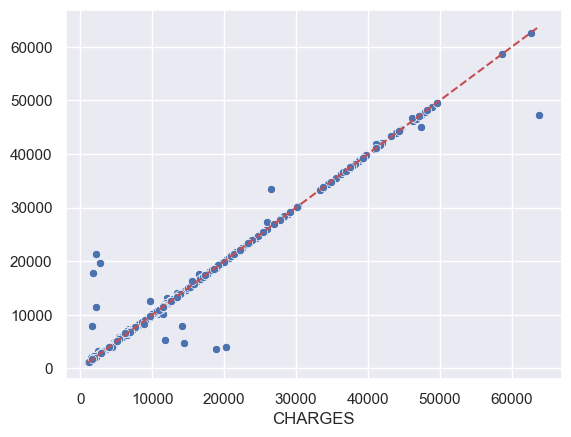

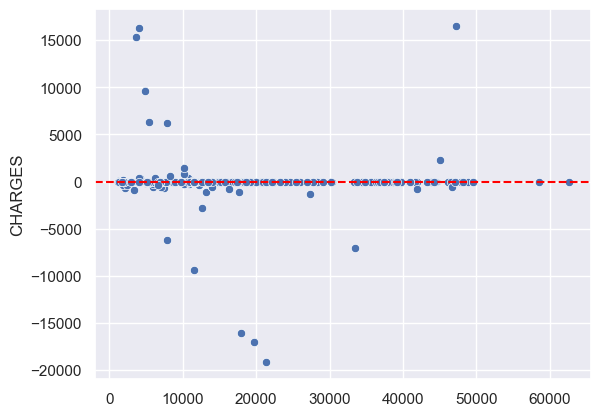

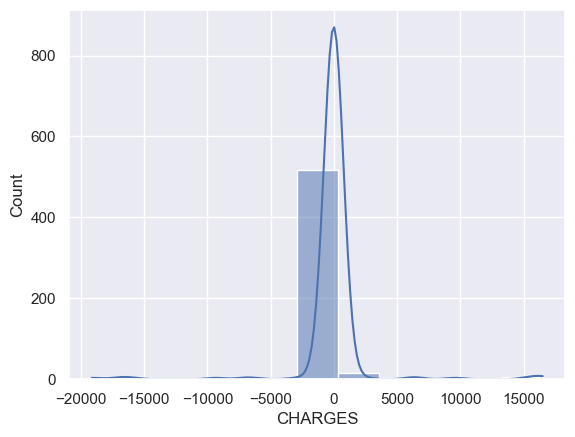

RMSE: 2695.9620028137324
MAE: 579.8806261801801
R²: 0.9526442155799347


In [685]:
# Train and predict
best_global_model.fit(X_train, y_train)
y_pred = best_global_model.predict(X_test)
residuals = y_test - y_pred

#  Actual vs Predicted
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Residuals
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Error distribution
sns.histplot(residuals, kde=True)
plt.show()

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


## 19. Feature Importance

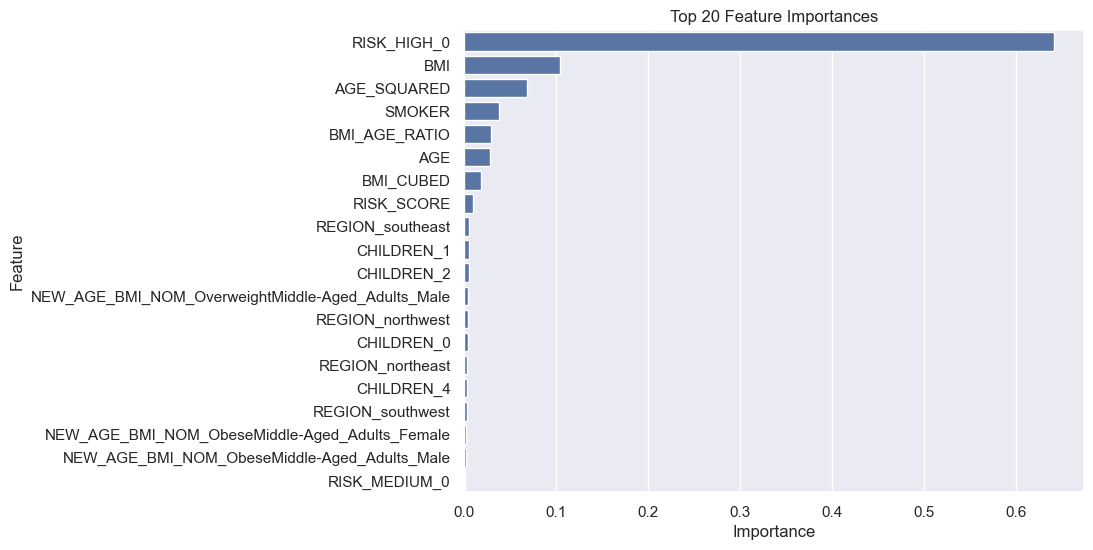

In [687]:

# Creating a DataFrame of feature importances
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_model.feature_importances_
})

feature_imp = feature_imp.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp.head(20))
plt.title('Top 20 Feature Importances')
plt.show()
